# Present Value Analysis
By

__Saud Qadir Khan__

__2019-MS-PET-3__

__Pet-E-515-Petroleum Economics__  
***
## Table of Contents
- [Instructions](#instruc)
- [Cash Receipts and Cash Disbursements](#cs)
-- [Seismic acquisition, processing, and interpretation costs](#seismic)
-- [Drilling and completion costs](#dc)
-- [Production facility costs](#pc)
-- [Lease operating costs](#lc)
-- [Corporate overhead costs](#coc)
-- [Revenues from the sale of crude and natural gas](#revenue)
-- - [Oil Price](#oil-price)
-- [Abondment cost](#ac)
-- [Salvage value](#sv)
-- [Cash Flow Diagram](#cfd)

<a id='instruc'></a>
## Instructions 
The goal of this assignment is to find the Present value of a oil company by using the Discounting process. You have to assume the costs of an oil field by dividing the oil field's life into logical steps starting from Acquiring the block and ending with the Field retirement. The life cycle should contain as many steps as possible with logical time frame for each step. once these costs are distributed on the time frame of the field assume the field is producing for 20 years and do assume the total oil rate logically with high rates in the start and declining at the end of the life cycle. using the current crude oil prices get the revenue and also discount these cash flows to present time. remember to allot operating and overhead costs during the production as well. if you want to add more production facilities do add anwhere in the life of the field. try to find the actual costs from the internet for each step and do put the references of the costs, prices, time needed etc wherever possible.
<font color=red>you should also make the cash flow diagram as well.</font>

<a id='cs'></a>
## Cash Receipts and Cash Disbursements
Every Oil company project typically have cash receipts and cash disbursements. _Cash receipts_ is inward flow of cash and _Cash disbursements_ is outward flow of cash.
Cash flows are 
- Seismic acquisition, processing, and interpretation costs
- Drilling and completion costs
- Production facility and lease operating costs
- Corporate overhead costs
- Revenues from the sale of crude and natural gas
- Abondment cost
- Salvage cost

Subtracting the cash disbursements from the cash receipts generate net negative or positive cash flow.
$$Net Cash Flow = Receipts - Disbursements$$

> Before we start, let's create a empty dataframe by assuming 20 years as lifetime for whole project. Moreover, in whole calculation, the ideal case scenario will be taken and ideal cost will be selected from the expected range of cost. One time cost will be distrubted equally over the period of task acquistion

In [1]:
import datetime # get current time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start_date = datetime.datetime(2021,1,8)
time = pd.date_range(start_date, periods=365*20+1, freq="D")
delta_time_yrs = [(date - time[0]).days / 365 for date in time]
df = pd.DataFrame(delta_time_yrs, columns=["delta_time_yrs"], index=time)
df['label'] = None
df[['seismic','drilling','prod_facility','overhead','abandonment','salvage']] = 0
df

,delta_time_yrs,label,seismic,drilling,prod_facility,overhead,abandonment,salvage
2021-01-08,0.000000,None,0,0,0,0,0,0
2021-01-09,0.002740,None,0,0,0,0,0,0
2021-01-10,0.005479,None,0,0,0,0,0,0
2021-01-11,0.008219,None,0,0,0,0,0,0
2021-01-12,0.010959,None,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2040-12-30,19.989041,None,0,0,0,0,0,0
2040-12-31,19.991781,None,0,0,0,0,0,0
2041-01-01,19.994521,None,0,0,0,0,0,0
2041-01-02,19.997260,None,0,0,0,0,0,0


<a id='seismic'></a>
### Seismic acquisition, processing, and interpretation costs
Seismic data helps to identify the structre of the formation in such a way that characteristics of formation holding oil and gas reserves can be evaluated earlier. The cost of acquisition depends on permit costs, crew costs, and other equipment costs. Currently, it costs around \\$75,000 per square mile to acquire 3D seismic data. The Oil and Gas Company that requests the acquisition spends at least $1 Million, and possibly over \\$40 Million, before they see any of the results.
(Source: [Erie Colorado](https://www.erieco.gov/DocumentCenter/View/11634/Seismic-Testing-FAQs))

The whole seismic data acquistion may take upto few weeks, in some cases only permit acquisition may take 7-8 months. The estimated cost is for our hypothetical block permitting, crew mobilization, system deployment, system rerieval and data processing.

In [2]:
permit_cost = -25000000
permit_days=len(df.loc['2021-01-08':'2021-10-28'])
permit_week = permit_days/7
df.iloc[0:permit_days,1]= 'permit'
df.iloc[0:permit_days,2] = permit_cost/permit_days
print(f"Exploration license and block aquiring will take {(permit_week)} weeks and permit cost is ${-permit_cost/10**6}MM")

Exploration license and block aquiring will take 42.0 weeks and permit cost is $25.0MM


In [3]:
seismic_cost = -15555555
seismic_days=len(df.loc['2021-10-29':'2022-01-20'])
cd_seismic= permit_days+seismic_days
seismic_week = seismic_days/7
df.iloc[permit_days:cd_seismic,1]= 'seismic data'
df.iloc[permit_days:cd_seismic,2] = seismic_cost/seismic_days
print(f"Seismic survey and data acquisition will take {int(seismic_week)} weeks and cost is ${-seismic_cost/10**6}MM")

Seismic survey and data acquisition will take 12 weeks and cost is $15.555555MM


<a id='dc'></a>
### Drilling and completion costs
Drilling costs make up to 25–35\% of the total development costs for a field. Drilling costs depends on the depth of the well and the daily rig rate. The rig daily rate will vary according to the rig type, water depth, distance from shore and drilling depth. For onshore, it will be <100,000 \\$/day, and for deepwater offshore Gulf of Mexico, it can be very high—up to 600,000 to 800,000 \\$/day (values are from 2010). The number of days will be a function of depth. For usual depth up to 20,000 ft, we can assume 70 to 80 days and for deeper depths up to 32,000 ft, a maximum of 150 days. For appraisal and development wells, we will need to add some extra costs such as evaluation and completion costs. One exploratory well will cost 55 - 88 MM$; 1 appraisal well at 55 - 88 MM\\$ 1 evaluation costs (15 days extra) 62.5 - 100 MM\\$
(Source: [ScienceDirect](https://www.sciencedirect.com/topics/engineering/drilling-cost))


In [4]:
DAILY_RIG_COST = -100000
exp_well_cost = -55000000
exp_well_days = 100
cd_exp_well = cd_seismic + exp_well_days
df.iloc[cd_seismic:cd_exp_well,1]= 'exploratory well'
df.iloc[cd_seismic:cd_exp_well,3] = DAILY_RIG_COST+ exp_well_cost/exp_well_days

apraisal_well_cost = -55000000
apr_well_days = 80
cd_apr_well = cd_exp_well+apr_well_days
df.iloc[cd_exp_well:cd_apr_well,1]= 'apraisal well'
df.iloc[cd_exp_well:cd_apr_well,3] = DAILY_RIG_COST+ apraisal_well_cost/apr_well_days

as we drill more wells, due to better understanding of the formation, the cost of drilling well will be decreased and drilling speed will also increase. We assume that number of days decrease by factor of _0.95_ and cost by factor of _0.98_ keeping minimum days required to drill a well is 45 while minimum cost is 60 MM$

In [5]:
wells = list(range(1,15+1))
well_name = ['well_'+str(i) for i in wells]
days = [max(int(80*.95**day),45) for day in wells]
costs = [max(int(-70000000*0.98**(cost)),-60000000) for cost in wells]
decline_rates = [round(np.random.choice(np.arange(0.001,0.002,0.00001)),5) for i in wells]


In [6]:
import random
#pd.options.mode.chained_assignment = None # remove warning
random.seed(11)

start_day = cd_apr_well
for well, cost, decline_rate, day in zip(well_name,costs, decline_rates,days):
    end_day = start_day+day
    df.iloc[start_day:end_day,1]= well
    df.iloc[start_day:end_day,3]= DAILY_RIG_COST + cost/day
    
    prod_days = len(df.iloc[end_day:-365-random.randint(1,300)])
    qi = random.randint(5000,10000)
    qt = qi * np.exp(-(decline_rate * np.arange(prod_days)))
    df.loc[df.index[end_day:end_day+prod_days], 'q_'+well] = qt 
    start_day = end_day
    print(f"{well} having initial flow rate of {qi}bbls and decline rate of {decline_rate}/day will produce for {prod_days} days")

well_1 having initial flow rate of 9585bbls and decline rate of 0.00199/day will produce for 6070 days
well_2 having initial flow rate of 8701bbls and decline rate of 0.00104/day will produce for 5991 days
well_3 having initial flow rate of 9811bbls and decline rate of 0.0014/day will produce for 5901 days
well_4 having initial flow rate of 6512bbls and decline rate of 0.00152/day will produce for 5999 days
well_5 having initial flow rate of 8897bbls and decline rate of 0.00198/day will produce for 5773 days
well_6 having initial flow rate of 5771bbls and decline rate of 0.00194/day will produce for 5882 days
well_7 having initial flow rate of 7485bbls and decline rate of 0.00179/day will produce for 5694 days
well_8 having initial flow rate of 5742bbls and decline rate of 0.00188/day will produce for 5797 days
well_9 having initial flow rate of 5343bbls and decline rate of 0.00169/day will produce for 5544 days
well_10 having initial flow rate of 8710bbls and decline rate of 0.00111/d

In [7]:
flow_rates = [col for col in df if col.startswith('q_well')]
df['total_q']=df[flow_rates].sum(axis=1).values
end_of_prod = df.index.get_loc(df[df['total_q']!=0].index.max())+1
df.iloc[start_day:end_of_prod,1]='production'

<a id='pc'></a>
### Production facility and Lease operating costs
The production facility cost are more complex and difficult to estimate.

Lease operating expenses are recurring costs associated with an active well and its associated equipment. These costs can include rent, insurance, and payroll. If multiple parties are involved, each party's lease operating cost is represented by their working interest in the well.

 The minimum cost attached is \\$12 per barrel of oil equivalent(boe) and some time it is high as \\$25 / boe

In [8]:
df['prod_facility'] = df['total_q'].values*-np.random.randint(12,25,len(df['total_q']))

<a id='coc'></a>
### Corporate overhead costs
Overhead expenses include accounting fees, advertising, insurance, interest, legal fees, labor burden, rent, repairs, supplies, taxes, telephone bills, travel expenditures, and utilities.and it will be distributed equally regardless of the production. Its value will be approx $10,000/year and distributed equally on daily basis

In [9]:
df['overhead']=float(-10000/365)

<a id='revenue'></a>
### Revenues from the sale of crude and natural gas
<a id='oil-price'></a>
#### Oil Price
oil price has direct relation with net cash flow because it is the only parameter that is taking part in positive cashflow or in-flow. In order to calculate the NPV we should have current or updated oil price. For this purpose, current oil price will be extracted from [oilprice.com](https://oilprice.com/oil-price-charts/). Ater extraction of oil prices for our this case, Brent crude oil price will be selected and it will be assume the price will be fix for whole project

In [10]:
import requests # retrive a request from url
from bs4 import BeautifulSoup # scrapping from url

results = requests.get("https://oilprice.com/oil-price-charts/").content
now = datetime.datetime.now()
soup = BeautifulSoup(results,features='lxml')
table = soup.find("table",{"data-id": "1"})
table = table.find_all("tr")[1:]
name, price =[],[]

for oil in table:
    x = oil.get_text().split("\n")
    name.append(x[1]),
    price.append(float(x[2][:5]))

oil_price = pd.DataFrame(list(zip(name, price)), columns =['name', 'price'])
print ("Data was extracted on :",now.strftime("%Y-%m-%d %H:%M:%S"))
oil_price

Data was extracted on : 2021-01-08 21:31:47


,name,price
0,WTI Crude,51.700
1,Brent Crude,55.470
2,Mars US,52.130
3,Opec Basket,53.840
4,Canadian Crude Index,34.340
5,DME Oman,54.320
6,Mexican Basket,50.230
7,Indian Basket,54.380
8,Western Canadian Select,35.880
9,Dubai,53.780


In [11]:
Oil= 'Brent Crude'
price = np.array(oil_price[oil_price['name']==Oil]['price'])
price

array([55.47])

In [12]:
df['revenue']=df['total_q']*price

<a id='ac'></a>
### Abandonment cost
A traditional abandonment process begins with a well killing operation in which produced fluids are circulated out of the well, or bull headed into the formation, and replaced by drilling fluids heavy enough to contain any open formation pressures. The cost to close ranges anywhere between \\$20,000-\\$40,000/well(Source: [eenews](https://www.eenews.net/assets/2020/06/22/document_ew_03.pdf))

In [13]:
aband_days= len(wells)*7
end_of_aband = end_of_prod+ aband_days
df.iloc[end_of_prod+1:end_of_aband,1]='abandonment'
df.iloc[end_of_prod+1:end_of_aband,6]=-200000*len(wells)/aband_days

<a id='sc'></a>
### Salvage value

In [14]:
df.iloc[end_of_aband:,1]='salvage'
df.iloc[end_of_aband:,7]=10000*len(wells)/len(df.iloc[end_of_aband:,1])

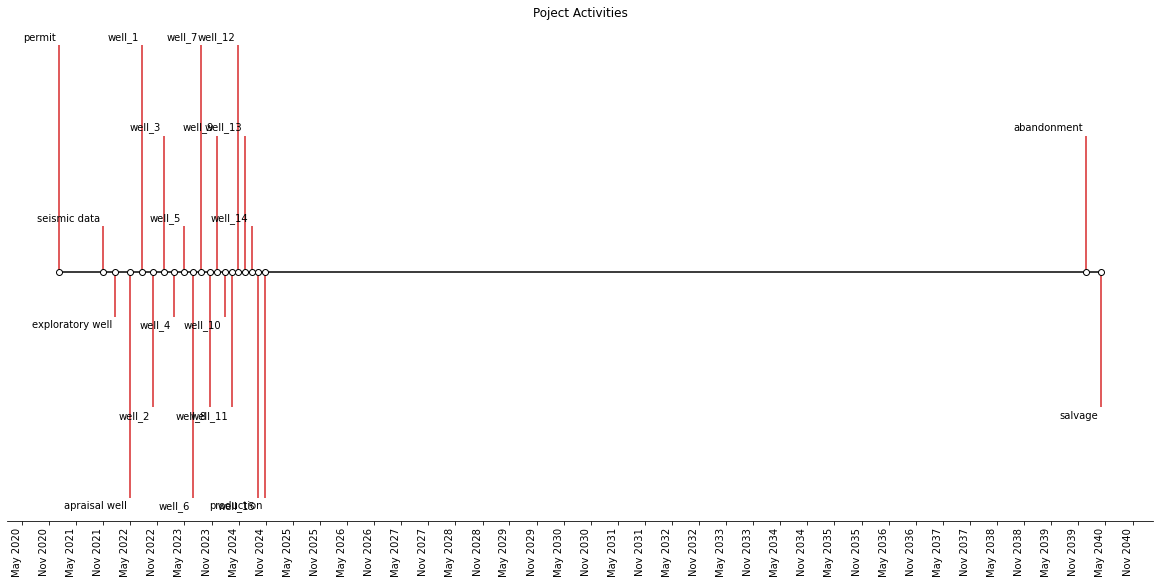

In [15]:
activities=df.label.value_counts().index.tolist()
dates=[]
for activity in activities:
    dates.append(df[df.label==activity].index[0])

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)
ax.set(title="Poject Activities")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, activities, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 6 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=6))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)


plt.show()

<a id='royalty'></a>
### Royalty 
Royalties are payments made by companies to the federal government for the oil and gas extracted on public lands and waters. Traditionally its 12.5%, but more recently around 18% – 25%. The percentage varies upon how well the landowner negotiated and how expensive the oil company expects the extraction of oil and gas to be.(Source: [Federal Energy Royalty Rates](https://www.wilderness.org/sites/default/files/media/file/Fact%20sheet%20-%20Federal%20Energy%20Royalty%20Rates.pdf))

In [16]:
royality_rate = 0.125
df['royalty']=df['revenue']*-royality_rate

## Disbursements, net revenue and net cashflow


In [17]:
df['disbursements']=df[['seismic','drilling','prod_facility','overhead','abandonment','salvage','royalty']].sum(axis=1).values
df['net_revenue'] = df['revenue']-df['royalty']
df['net_cash_flow'] = df['net_revenue'] + df['disbursements']

### Present Value
![present_value](https://www.gstatic.com/education/formulas2/-1/en/present_value_formula.svg)

In [18]:
cfd = df[['seismic','drilling','prod_facility','overhead','revenue','abandonment','salvage','net_cash_flow']]
cfd=cfd.groupby(by=[cfd.index.year]).sum()
cfd= cfd/1000000
cfd

,seismic,drilling,prod_facility,overhead,revenue,abandonment,salvage,net_cash_flow
2021,-36.851851,0.000000,0.000000,-0.009808,0.000000,0.000000,0.00000,-36.861660
2022,-3.703704,-279.500000,-17.105562,-0.010000,51.546188,0.000000,0.00000,-248.773078
2023,0.000000,-406.732842,-200.190297,-0.010000,623.476094,0.000000,0.00000,16.542955
2024,0.000000,-389.145711,-359.150421,-0.010027,1076.763230,0.000000,0.00000,328.457070
2025,0.000000,0.000000,-300.615734,-0.010000,924.770889,0.000000,0.00000,624.145155
2026,0.000000,0.000000,-179.026576,-0.010000,549.523496,0.000000,0.00000,370.486920
2027,0.000000,0.000000,-105.702054,-0.010000,331.062636,0.000000,0.00000,225.350582
2028,0.000000,0.000000,-65.892341,-0.010027,202.470472,0.000000,0.00000,136.568104
2029,0.000000,0.000000,-40.560710,-0.010000,124.612520,0.000000,0.00000,84.041810
2030,0.000000,0.000000,-25.013975,-0.010000,77.791942,0.000000,0.00000,52.767968


In [19]:
t= cfd.index-cfd.index[0]
discount_rate =0.09 #discount rate

for i in cfd.columns:
    cfd[i]=cfd[i].values*1/np.power((1+discount_rate),t)
cfd

,seismic,drilling,prod_facility,overhead,revenue,abandonment,salvage,net_cash_flow
2021,-36.851851,0.000000,0.000000,-0.009808,0.000000,0.000000,0.000000,-36.861660
2022,-3.397893,-256.422018,-15.693176,-0.009174,47.290081,0.000000,0.000000,-228.232181
2023,0.000000,-342.338896,-168.496168,-0.008417,524.767355,0.000000,0.000000,13.923874
2024,0.000000,-300.491889,-277.330022,-0.007743,831.458778,0.000000,0.000000,253.629123
2025,0.000000,0.000000,-212.963765,-0.007084,655.131012,0.000000,0.000000,442.160163
2026,0.000000,0.000000,-116.354991,-0.006499,357.152568,0.000000,0.000000,240.791078
2027,0.000000,0.000000,-63.026681,-0.005963,197.401833,0.000000,0.000000,134.369189
2028,0.000000,0.000000,-36.045367,-0.005485,110.758282,0.000000,0.000000,74.707430
2029,0.000000,0.000000,-20.356053,-0.005019,62.538822,0.000000,0.000000,42.177751
2030,0.000000,0.000000,-11.517129,-0.004604,35.817571,0.000000,0.000000,24.295838


## Cash Flow Diagram

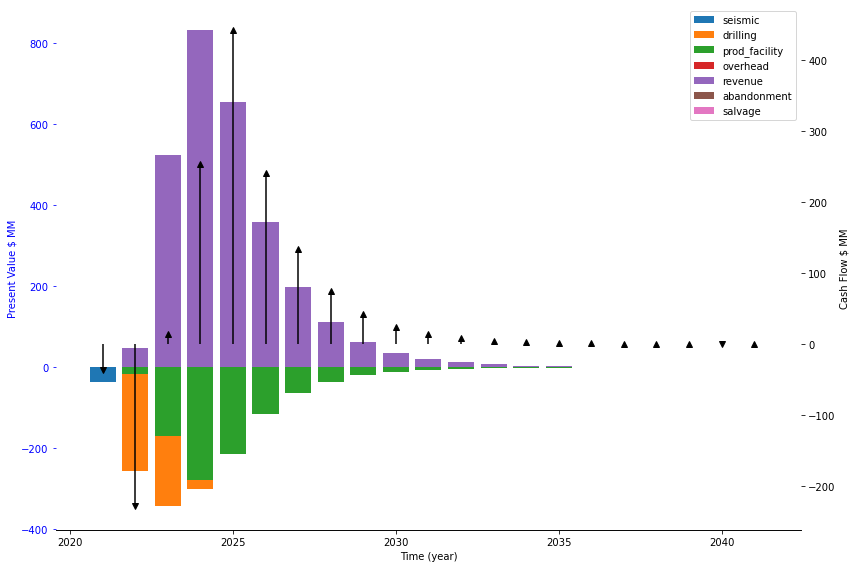

In [20]:
t= np.array(cfd.index)
cashflow= cfd['net_cash_flow'].values

fig, ax1 = plt.subplots(figsize=([12,8]))

ax1.bar(t, cfd.seismic.values,label ='seismic')
ax1.bar(t, cfd.drilling.values,label ='drilling')
ax1.bar(t, cfd.prod_facility.values,label ='prod_facility')
ax1.bar(t, cfd.overhead.values,label ='overhead')
ax1.bar(t, cfd.revenue.values,label ='revenue')
ax1.bar(t, cfd.abandonment.values,label ='abandonment')
ax1.bar(t, cfd.salvage.values,label ='salvage')
ax1.legend()
ax1.set_xlabel('Time (year)')

ax1.set_ylabel('Present Value $ MM', color = 'b')
ax1.tick_params('y', colors = 'b')
# Define twin axis for cashflow
ax2 = ax1.twinx()

# Find positive and negative values in cashflow
pos = [i for i in range(len(cashflow)) if cashflow[i] > 0]
neg = [i for i in range(len(cashflow)) if cashflow[i] < 0]

if (len(pos)):
    markerline, stemlines, baseline = ax2.stem(t[pos], cashflow[pos], markerfmt='^', basefmt=" ")
    plt.setp(stemlines, 'color', 'k')
    plt.setp(markerline, 'color', 'k')
if (len(neg)):
    markerline, stemlines, baseline = ax2.stem(t[neg], cashflow[neg] ,markerfmt='v', basefmt=" ")
    plt.setp(stemlines, 'color', 'k')
    plt.setp(markerline, 'color', 'k')

ax2.set_ylabel('Cash Flow $ MM', color='k')
ax2.tick_params('y', colors='k')
fig.tight_layout()
for spine in ["left", "top", "right"]:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)


plt.show()

In [21]:
def formatter(x):
    return str(x) if x >= 0 else f'({abs(round(x,5))})'

for col in cfd.columns:
    cfd[col] = cfd[col].apply(formatter)
cfd

,seismic,drilling,prod_facility,overhead,revenue,abandonment,salvage,net_cash_flow
2021,(36.85185),0.0,0.0,(0.00981),0.0,0.0,0.0,(36.86166)
2022,(3.39789),(256.42202),(15.69318),(0.00917),47.290080812995775,0.0,0.0,(228.23218)
2023,0.0,(342.3389),(168.49617),(0.00842),524.7673546177945,0.0,0.0,13.923874201984102
2024,0.0,(300.49189),(277.33002),(0.00774),831.4587779328301,0.0,0.0,253.6291232463501
2025,0.0,0.0,(212.96376),(0.00708),655.1310120509335,0.0,0.0,442.1601631960767
2026,0.0,0.0,(116.35499),(0.0065),357.15256770212693,0.0,0.0,240.79107761267892
2027,0.0,0.0,(63.02668),(0.00596),197.40183313255662,0.0,0.0,134.36918927835364
2028,0.0,0.0,(36.04537),(0.00549),110.75828198304549,0.0,0.0,74.70742962115635
2029,0.0,0.0,(20.35605),(0.00502),62.53882200868173,0.0,0.0,42.17775066333958
2030,0.0,0.0,(11.51713),(0.0046),35.81757131094895,0.0,0.0,24.29583819102205


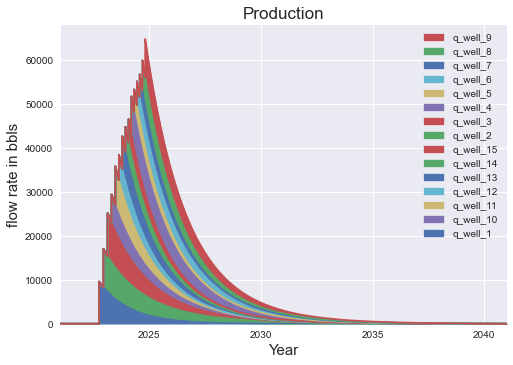

In [22]:
plt.style.use('seaborn')
df[flow_rates].plot.area()
plt.xlabel('Year', fontsize=15)
plt.ylabel('flow rate in bbls', fontsize=15)
plt.title('Production',fontsize=17)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
ax.legend(handles, labels)
plt.show()